# JillyAtlanta Sales Analysis
Dollars for each Pattern
***

In [1]:
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt

In [2]:
fiels = glob.glob('./etsy/EtsySoldOrderItems/*.csv')
df1 = pd.DataFrame()
for fiel in fiels:
    dfi = pd.read_csv(fiel)
    df1 = pd.concat([df1, dfi])
# df1.columns

In [3]:
et_items = df1[['Sale Date',
           'Order ID', 
           'Item Name']].copy()
et_items.columns = ['date', 'order_id', 'item_name']
et_items['date'] = pd.to_datetime(et_items['date'])
et_items.sort_values(by='date', inplace=True)
# et_items.head()

In [4]:
def is_pdf(x):
    return 'pdf' in x.casefold()

et_items['is_pdf'] = et_items.item_name.apply(is_pdf)

In [5]:
# et_items.head()
# len(et_items)

In [6]:
et_items.drop_duplicates(subset=['order_id'], inplace=True)
#et_items.head(30)
# len(et_items)

In [7]:
fiels = glob.glob('./etsy/EtsySales/*.csv')
df2 = pd.DataFrame()
for fiel in fiels:
    dfi = pd.read_csv(fiel)
    df2 = pd.concat([df2, dfi])
# df2.columns

In [8]:
et_sales = df2[['Order Date',
                'Order ID', 
                'Net Amount', 
                'Refund Amount']].copy()
et_sales.columns = ['date', 'order_id', 'payment_amt', 'refund_amt']
et_sales['date'] = pd.to_datetime(et_sales['date'])
et_sales.sort_values(by='date', inplace=True)
et_sales.head()
len(et_sales)

12225

In [9]:
et_merged = pd.merge(et_sales, et_items, on='order_id', how='left')
et_merged.head(30)
len(et_merged)

12225

In [10]:
print(len(et_merged))
et_merged = et_merged[et_merged.is_pdf == True]
print(len(et_merged))
et_merged['net_amt'] = et_merged['payment_amt'] - et_merged['refund_amt']
#et_merged.head()

12225
11915


In [11]:
#listings = et_merged.item_name.drop_duplicates()
#len(listings)

In [12]:
listings = pd.read_csv('listings.csv')
listings_dict = dict(zip(listings.listing.values, listings.item.values))

In [13]:
et_merged['item'] = et_merged['item_name'].map(listings_dict)
et = et_merged[['date_x', 'item', 'net_amt']].copy()
et.columns = ['date', 'item', 'net']
#et.head()

In [14]:
patterns_set = list(set(et.item.values))

In [15]:
df3 = pd.read_csv('./shopify/sales.csv')
# Get rid of dates that have no sales
df3 = df3.dropna(axis=0)
#df3.head()

Make 'item' column for shopify df based on names from etsy df.

In [16]:
patterns = df3.product_title.unique()
sh_patt_dict = {}
for pattern in patterns:
    x = pattern.lower().split()
    pattp = x[0]
    for i in range(1, len(x)):
        if pattp in patterns_set:
            break
        else:
            pattp += ('_' + x[i])
    #print(pattp)
    sh_patt_dict[pattern] = pattp

In [17]:
df3['item'] = df3['product_title'].map(sh_patt_dict)
df3.reset_index(inplace=True)
#df3.head()

In [18]:
sh = df3[['day', 'item', 'net_sales']].copy()
sh.columns = ['date', 'item', 'net']
sh['date'] = pd.to_datetime(sh['date'])

In [19]:
et0 = et[['date', 'item', 'net']]
ja = pd.concat([et0, sh], ignore_index=True)
ja.sort_values(by=['date'], inplace=True)
ja.to_csv(r'x.csv')

In [20]:
jap = ja.groupby(['item'])['net'].sum().reset_index()
#df.groupby(['group1','group2'])['sum_col'].sum().reset_index()
jap.sort_values(by='net', inplace=True, ascending=False)
jap.head()

,item,net
28,macy,16176.72
35,melbourne,12077.04
31,marlow,7821.13
21,laurel,5801.77
2,angelica,5668.07


In [21]:
X = jap.item.values
heights = jap.net.values

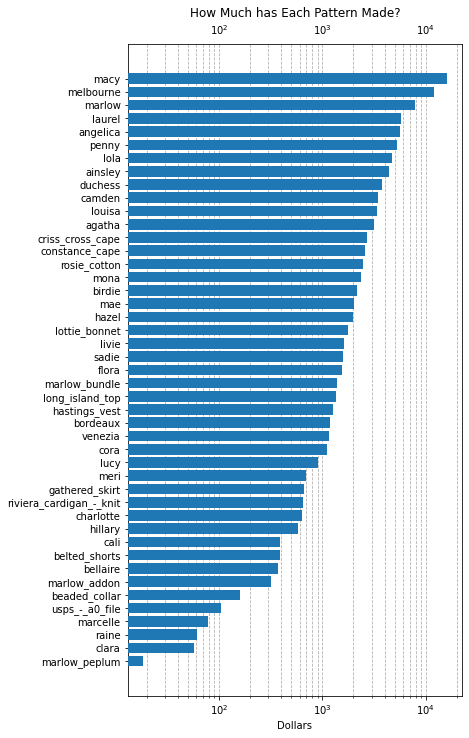

In [22]:
plt.figure(figsize=(6, 12))
#plt.xticks(rotation=90)
plt.xscale('log')
#plt.xlabel(X,loc=['top','bottom'])
plt.tick_params(labeltop=True)
plt.grid(axis='x', linestyle='--', which='both', zorder=0)
plt.barh(X, heights, zorder=3)
plt.gca().invert_yaxis()
plt.title('How Much has Each Pattern Made?')
plt.xlabel('Dollars')
plt.show()

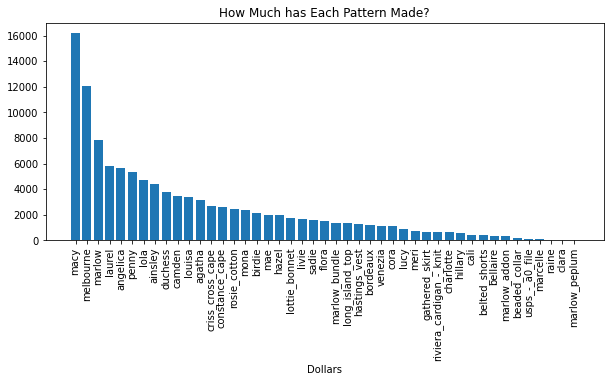

In [23]:
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
plt.bar(X, heights)
plt.title('How Much has Each Pattern Made?')
plt.xlabel('Dollars')
plt.show()